# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [569]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [570]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as SFS_PLOT

In [571]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [572]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Problem Statement :-

### Based on the profile of the person we have to predict if they have subscribed to term deposit.

## <span style="color:blue">Steps followed to Analyse the Data :-</span>
### <span style="color:green">1. Analyze the Data for null values and missing values to be filled.Null values are not seen the data.</span>
### <span style="color:green">2. Analyze the Data for encoding, most of the data. Most of the columns are category type column. Category encoded the columns.</span>
### <span style="color:green">3. Analyze the Data for imbalance. It is seen that the data is imbalanced. Balance the data for better model performance.</span>

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

## <span style="color:orange">Select the first 7 columns in the data frame as the features to train the model</span>

In [ ]:
data = df.iloc[:,1:8]

## <span style="color:orange">Check for Null or Missing Values in the data frame</span>

In [ ]:
for c in data.columns:
        print('missing values in - ' + str(c) + '  ' + str(data[c].isnull()))
for x in data.columns:
    values=[]
    for i in data[x].unique():
        values.append(i)
    print(str(x) + '--' + str(values))

## <span style="color:orange">Encode the columns using Category Encoder</span>

In [ ]:
dCopy = data
dCopy['y'] = df['y']

for x in data.columns:
    dCopy[x] = dCopy[x].astype('category')
    dCopy[x] = dCopy[x].cat.codes

for x in data.columns:
    values=[]
    for i in data[x].unique():
        values.append(i)
    print(str(x) + '--' + str(values))

In [ ]:
def bar_plot(data):
    data.value_counts().sort_values().plot(kind = 'bar')

In [ ]:
def print_target_stats(y_train,y_test):
    print(f"Training target statistics: {Counter(y_train)}")
    print(f"Testing target statistics: {Counter(y_test)}")

In [ ]:
X=dCopy.drop('y',axis=1)
y=dCopy['y']

## <span style="color:orange">Plot the Class to check imbalance</span>

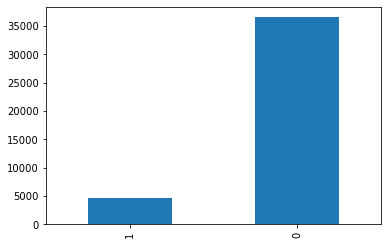

In [580]:
bar_plot(y)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

## <span style="color:orange">Split the data and Training and Testing data at 70:30 ratio</span>

In [581]:
X_t,X_test,y_t,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [582]:
print_target_stats(y_t,y_test)

Training target statistics: Counter({0: 25580, 1: 3251})
Testing target statistics: Counter({0: 10968, 1: 1389})


## <span style="color:orange">Apply SMOTE to Balance the Class</span>

In [583]:
sampler = SMOTE(k_neighbors=2)
X_sampled, y_sampled = sampler.fit_resample(X_t, y_t)

In [584]:
print_target_stats(y_sampled,y_test)

Training target statistics: Counter({0: 25580, 1: 25580})
Testing target statistics: Counter({0: 10968, 1: 1389})


## <span style="color:orange">Plot the Class to check for imbalace after applying SMOTE</span>

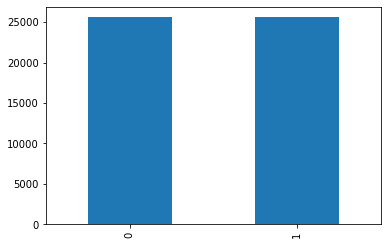

In [585]:
bar_plot(y_sampled)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

## <span style="color:blue">Model Building Steps [Logistic Regression, KNN, Decision Tree Classifier, SVC]:-</span>
### <span style="color:green">1. The first 7 columns are used as features for the model. The rest of the columns are dropped.</span>
### <span style="color:green">2. Split the data into Train and Test data with 30% data going into Test. Used the balanced data for model building</span>
### <span style="color:green">3. Plot the Sequential Feature Selection to see the gain with the selected features for each of the model.</span>
### <span style="color:green">4. Collect the model metrics viz. score, fit time etc. into a data frame and plot it to see the trend.</span>


In [587]:
def print_vif(X):
    return pd.Series([variance_inflation_factor(X.values, i) 
                for i in range(X.shape[1])], 
                    index=X.columns).sort_values(ascending=False)

## <span style="color:orange">Print the variance inflation factor to check for multi correlation</span>

In [588]:
print(print_vif(data))

y            0.007901
loan         0.005769
housing     -0.000045
job         -0.000116
education   -0.000550
marital     -0.000755
contact     -0.005939
default     -0.013747
dtype: float64


## <span style="color:orange">Create a data frame to record the scores and fit time of the models</span>

In [589]:
comparison= pd.DataFrame({'model': [], 
             'best_params': [],
             'best_score': [],
             'best_time':[],
             'accuracy_score':[],
             'roc_auc_score':[]})
comparison=comparison.astype(str)
print(comparison.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           0 non-null      object
 1   best_params     0 non-null      object
 2   best_score      0 non-null      object
 3   best_time       0 non-null      object
 4   accuracy_score  0 non-null      object
 5   roc_auc_score   0 non-null      object
dtypes: object(6)
memory usage: 124.0+ bytes
None


## <span style="color:orange">For each of the model execute the SFS and plot it to see the feature selection and find the importance of the feature using permutation importance. Finally run the the fit and predict and record score and fit time for each model in the comparison data frame. Confusion matrix also helps verify the accuracy of the model visually.</span>

In [590]:
def print_line_separator():
    print('###################################################################################################################')
    

In [591]:
def sfs(model,X_train,y_train):
    sfs = SFS(model,
             k_features=X_train.shape[1],
             forward=True,
             scoring="neg_root_mean_squared_error",
             cv=5)
    sfs.fit(X_train,y_train)
    SFS_PLOT(sfs.get_metric_dict())

In [592]:
def pi(name,model,X_train,y_train,title='Confusion Matrix',cmap=plt.cm.Blues):
    
    sfs(model,X_train,y_train)
    
    start=time.time()
    reg_model=model.fit(X_train,y_train)
    end=time.time()
    
    r = permutation_importance(reg_model,X_train,y_train,n_repeats=9,random_state=42)
    r.importances_mean
    pi = pd.DataFrame({"Features":X_train.columns,"importance":r.importances_mean}).sort_values(by="importance",ascending=False)
    print_line_separator()
    print(pi)    
    
    pred=model.predict(X_test)
    score = model.score(X_test,y_test)
    model_params = model.get_params()
    accuracy = accuracy_score(y_test, pred)
    auc = roc_auc_score(y_test,pred)
    
    print_line_separator()
    conf = metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicated label')
    
    comparison.loc[len(comparison.index)] = [name,model_params,score,end-start,accuracy,auc]
    print(comparison)
    print_line_separator()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [593]:
def reg_model(name,X_train,y_train,X_test,y_test):
    reg=''
    if(name=='LR'):
        reg = LogisticRegression()
    if(name=='KNN'):
        reg = KNeighborsClassifier()
    if(name=='DC'):
        reg = DecisionTreeClassifier()
    if(name=='SVC'):
        reg = LinearSVC()
    pi(name,reg,X_train,y_train)
#np.seterr('raise')

###################################################################################################################
    Features  importance
6    contact    0.102055
3    default    0.050541
0        job    0.000000
1    marital    0.000000
2  education    0.000000
4    housing    0.000000
5       loan    0.000000
###################################################################################################################
  model                                        best_params  best_score  \
0    LR  {'C': 1.0, 'class_weight': None, 'dual': False...     0.53144   

   best_time  accuracy_score  roc_auc_score  
0   0.104012         0.53144       0.628845  
###################################################################################################################


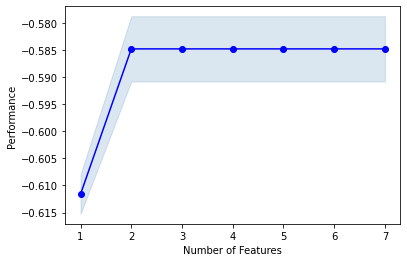

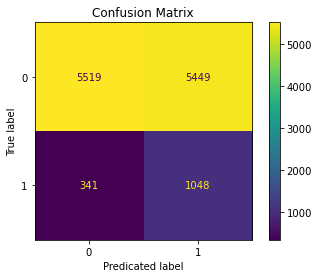

In [594]:
reg_model('LR',X_sampled,y_sampled,X_test,y_test)

###################################################################################################################
    Features  importance
0        job    0.033594
2  education    0.025510
6    contact    0.015120
4    housing    0.014773
5       loan    0.012829
1    marital    0.010049
3    default    0.006385
###################################################################################################################
  model                                        best_params  best_score  \
0    LR  {'C': 1.0, 'class_weight': None, 'dual': False...    0.531440   
1   KNN  {'algorithm': 'auto', 'leaf_size': 30, 'metric...    0.875293   

   best_time  accuracy_score  roc_auc_score  
0   0.104012        0.531440       0.628845  
1   0.021662        0.875293       0.527339  
###################################################################################################################


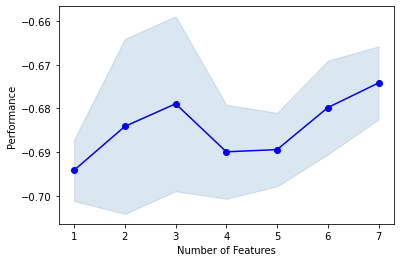

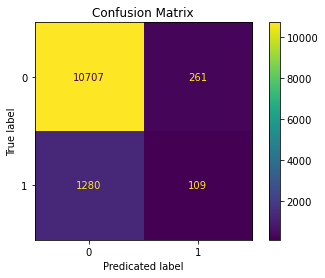

In [595]:
reg_model('KNN',X_sampled,y_sampled,X_test,y_test)

###################################################################################################################
    Features  importance
0        job    0.110731
6    contact    0.094414
2  education    0.089115
3    default    0.052445
1    marital    0.048877
4    housing    0.035321
5       loan    0.029116
###################################################################################################################
  model                                        best_params  best_score  \
0    LR  {'C': 1.0, 'class_weight': None, 'dual': False...    0.531440   
1   KNN  {'algorithm': 'auto', 'leaf_size': 30, 'metric...    0.875293   
2    DC  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...    0.601683   

   best_time  accuracy_score  roc_auc_score  
0   0.104012        0.531440       0.628845  
1   0.021662        0.875293       0.527339  
2   0.027865        0.601683       0.614341  
#######################################################################################

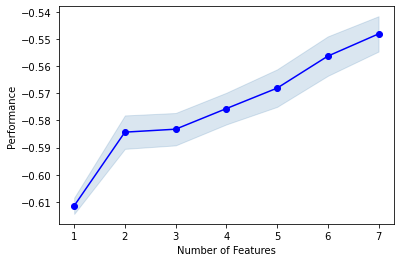

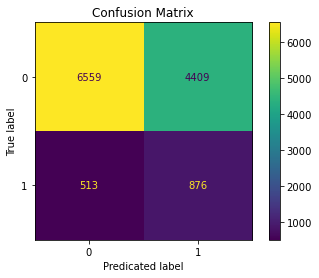

In [596]:
reg_model('DC',X_sampled,y_sampled,X_test,y_test)

###################################################################################################################
    Features  importance
6    contact    0.102139
3    default    0.050556
0        job    0.000000
1    marital    0.000000
2  education    0.000000
4    housing    0.000000
5       loan    0.000000
###################################################################################################################
  model                                        best_params  best_score  \
0    LR  {'C': 1.0, 'class_weight': None, 'dual': False...    0.531440   
1   KNN  {'algorithm': 'auto', 'leaf_size': 30, 'metric...    0.875293   
2    DC  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...    0.601683   
3   SVC  {'C': 1.0, 'class_weight': None, 'dual': True,...    0.531440   

   best_time  accuracy_score  roc_auc_score  
0   0.104012        0.531440       0.628845  
1   0.021662        0.875293       0.527339  
2   0.027865        0.601683       0.614341  
3   2.360158 

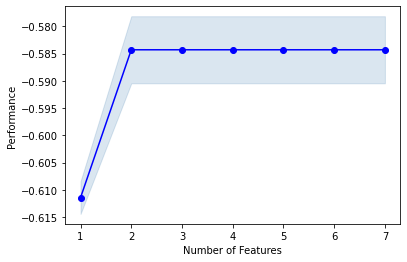

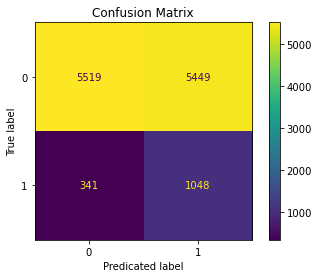

In [597]:
reg_model('SVC',X_sampled,y_sampled,X_test,y_test)

### Problem 9: Score the Model

What is the accuracy of your model?

## <span style="color:orange">Plot the model score and time to see the performance of each of the model</span>

<AxesSubplot:xlabel='model', ylabel='best_score'>

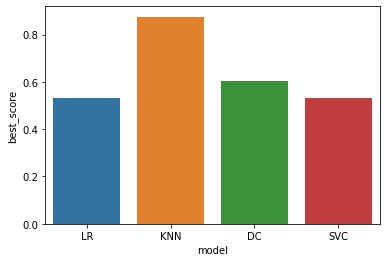

In [598]:
sns.barplot(data=comparison,x=comparison['model'],y=comparison['best_score'])

<AxesSubplot:xlabel='model', ylabel='best_time'>

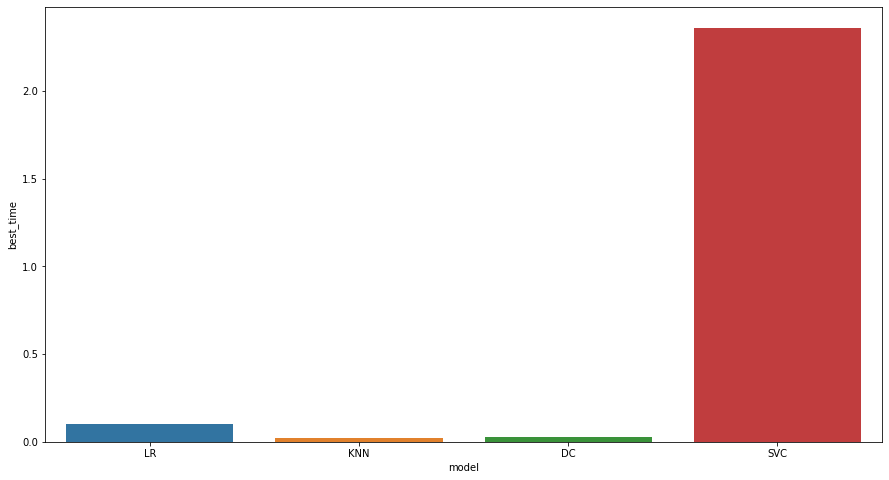

In [805]:
sns.barplot(data=comparison,x=comparison['model'],y=comparison['best_time'])

## <span style="color:blue">Conclusion from Basic Model</span>
### <span style="color:green">The Basic model is seen to have low performance. KNN being the best performing model in terms of accuracy and Decision Tree being the best performing in terms of training time</span>


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

## <span style="color:blue">Model Testing and Cross Validation</span>
### <span style="color:green">Use a cross validation technique to test the model and see if there are any improvements.</span>
### <span style="color:green">Default params have been used.</span>
### <span style="color:green">Record the model metrics in a data frame and plot to see the comparison on fit time and accuracy.</span>

In [693]:
dfCompare= pd.DataFrame({'Model': [], 
             'Train_Time': [],
             'Test_Time': [],
             'Train_Accuracy': [],
             'Test_Accuracy':[]})
dfCompare=dfCompare.astype(str)
print(dfCompare.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Model           0 non-null      object
 1   Train_Time      0 non-null      object
 2   Test_Time       0 non-null      object
 3   Train_Accuracy  0 non-null      object
 4   Test_Accuracy   0 non-null      object
dtypes: object(5)
memory usage: 124.0+ bytes
None


## <span style="color:orange">For each of the model execute the SFS and plot it to see the feature selection and find the importance of the feature using permutation importance. Finally run the the fit and predict and record score and fit time for each model in the comparison data frame. Confusion matrix also helps verify the accuracy of the model visually.</span>

In [694]:
parameters = {
                #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                #'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                #'max_iter': [10, 30, 80, 100, 120],
                #'process__max_features': [100, 500, 1000, 2000]
                #'class_weight': [None, 'balanced']
            }

In [695]:
def pi_grid(name,model,X_train,y_train,title='Confusion Matrix',cmap=plt.cm.Blues):
    
    sfs(model,X_train,y_train)
    
    train_start=time.time()
    reg_model=model.fit(X_train,y_train)
    train_end=time.time()
    
    r = permutation_importance(reg_model,X_train,y_train,n_repeats=9,random_state=42)
    r.importances_mean
    pi = pd.DataFrame({"Features":X_train.columns,"importance":r.importances_mean}).sort_values(by="importance",ascending=False)
    print_line_separator()
    print(pi)
    train_score = model.score(X_test,y_test)
    
    grid = GridSearchCV(estimator=model, param_grid=parameters)
    test_start=time.time()
    grid.fit(X_train,y_train)
    test_end=time.time()
    grid_pred=grid.predict(X_test)
    test_score=grid.score(X_test,y_test)
    print_line_separator()
    conf = metrics.ConfusionMatrixDisplay.from_predictions(y_test, grid_pred)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicated label')
    
    dfCompare.loc[len(dfCompare.index)] = [name,train_end-train_start,test_end-test_start,train_score,test_score]
    print(dfCompare)
    print_line_separator()

In [696]:
def reg_grid_model(name,X_train,y_train,X_test,y_test):
    reg=''
    if(name=='LR'):
        reg = LogisticRegression()
    if(name=='KNN'):
        reg = KNeighborsClassifier()
    if(name=='DC'):
        reg = DecisionTreeClassifier()
    if(name=='SVC'):
        reg = LinearSVC()
    pi_grid(name,reg,X_train,y_train)
#np.seterr('raise')

###################################################################################################################
    Features  importance
6    contact    0.102055
3    default    0.050541
0        job    0.000000
1    marital    0.000000
2  education    0.000000
4    housing    0.000000
5       loan    0.000000
###################################################################################################################
  Model  Train_Time  Test_Time  Train_Accuracy  Test_Accuracy
0    LR    0.104947   0.477382         0.53144        0.53144
###################################################################################################################


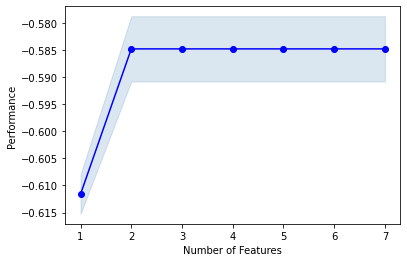

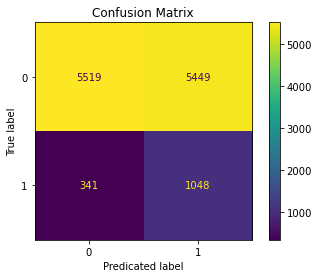

In [697]:
reg_grid_model('LR',X_sampled,y_sampled,X_test,y_test)

###################################################################################################################
    Features  importance
0        job    0.032821
2  education    0.024118
4    housing    0.015970
6    contact    0.012957
5       loan    0.012032
1    marital    0.008716
3    default    0.006472
###################################################################################################################
  Model  Train_Time  Test_Time  Train_Accuracy  Test_Accuracy
0    LR    0.104947   0.477382        0.531440       0.531440
1   KNN    0.022185   2.168465        0.876912       0.876912
###################################################################################################################


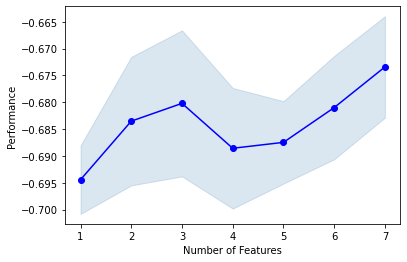

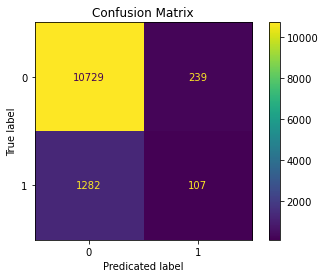

In [698]:
reg_grid_model('KNN',X_sampled,y_sampled,X_test,y_test)

###################################################################################################################
    Features  importance
0        job    0.118797
6    contact    0.092844
2  education    0.091882
1    marital    0.053325
3    default    0.052432
4    housing    0.036333
5       loan    0.031099
###################################################################################################################
  Model  Train_Time  Test_Time  Train_Accuracy  Test_Accuracy
0    LR    0.104947   0.477382        0.531440       0.531440
1   KNN    0.022185   2.168465        0.876912       0.876912
2    DC    0.024489   0.152855        0.608967       0.609290
###################################################################################################################


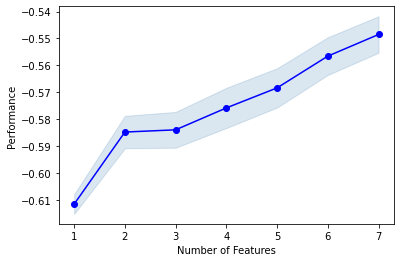

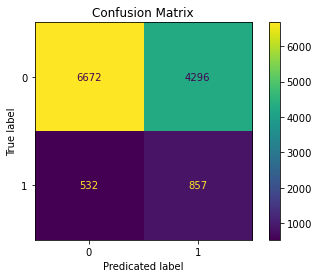

In [699]:
reg_grid_model('DC',X_sampled,y_sampled,X_test,y_test)

###################################################################################################################
    Features  importance
6    contact    0.102055
3    default    0.050541
0        job    0.000000
1    marital    0.000000
2  education    0.000000
4    housing    0.000000
5       loan    0.000000
###################################################################################################################
  Model  Train_Time  Test_Time  Train_Accuracy  Test_Accuracy
0    LR    0.104947   0.477382        0.531440       0.531440
1   KNN    0.022185   2.168465        0.876912       0.876912
2    DC    0.024489   0.152855        0.608967       0.609290
3   SVC    2.627875  12.973452        0.531440       0.531440
###################################################################################################################


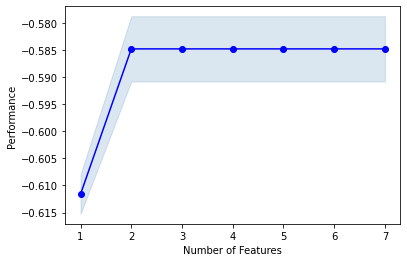

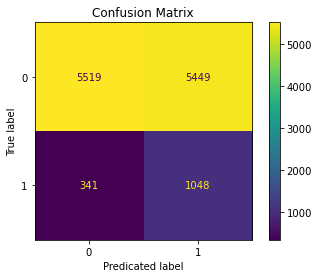

In [700]:
reg_grid_model('SVC',X_sampled,y_sampled,X_test,y_test)

<AxesSubplot:xlabel='Model', ylabel='Train_Accuracy'>

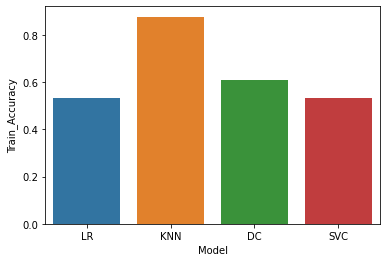

In [701]:
sns.barplot(data=dfCompare,x=dfCompare['Model'],y=dfCompare['Train_Accuracy'])

<AxesSubplot:xlabel='Model', ylabel='Test_Accuracy'>

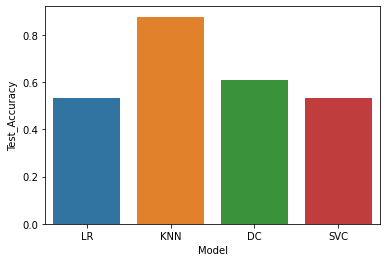

In [702]:
sns.barplot(data=dfCompare,x=dfCompare['Model'],y=dfCompare['Test_Accuracy'])

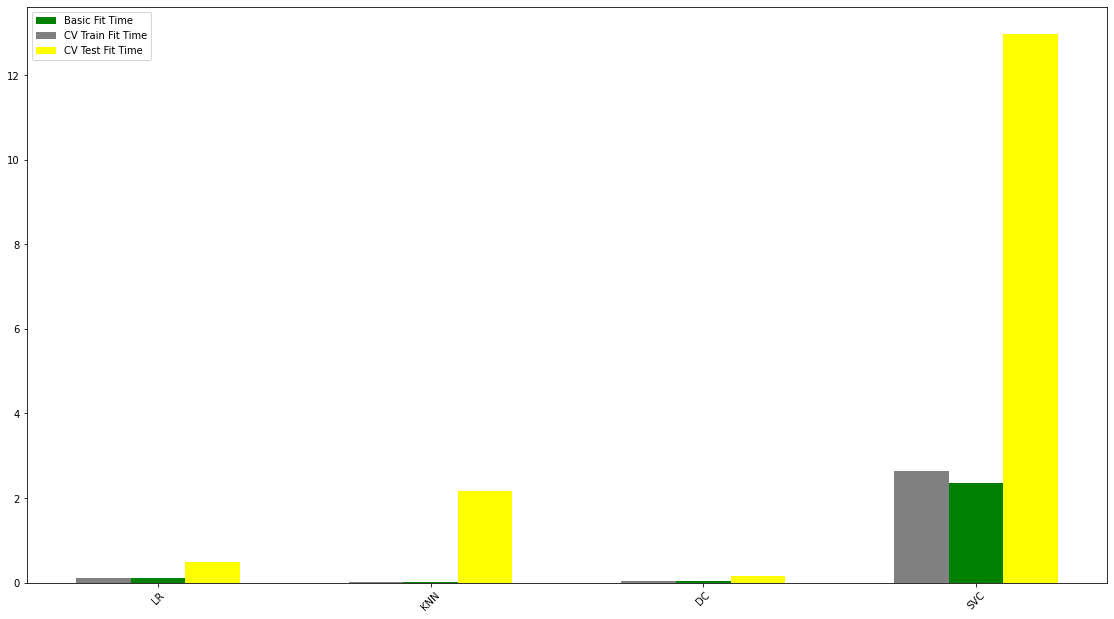

In [806]:
plot_comparison=comparison
plot_comparison['Train_Time'] = dfCompare['Train_Time']
plot_comparison['Test_Time'] = dfCompare['Test_Time']
basic_scores=plot_comparison['best_time']
cv_train_scores=plot_comparison['Train_Time']
cv_test_scores=plot_comparison['Test_Time']
fig = plt.figure()
X_axis = np.arange(len(plot_comparison['model']))
ax = fig.add_axes([0,0,1,1])
plt.bar(X_axis,basic_scores,0.2,color='green',label='Basic Fit Time')
plt.bar(X_axis - 0.2,cv_train_scores,0.2,color='grey',label='CV Train Fit Time')
plt.bar(X_axis + 0.2,cv_test_scores,0.2,color='yellow',label='CV Test Fit Time')
plt.xticks(rotation = 45)
plt.xticks(X_axis, comparison['model'])
plt.legend()
plt.rcParams['figure.figsize']=(15,8)
plt.show()

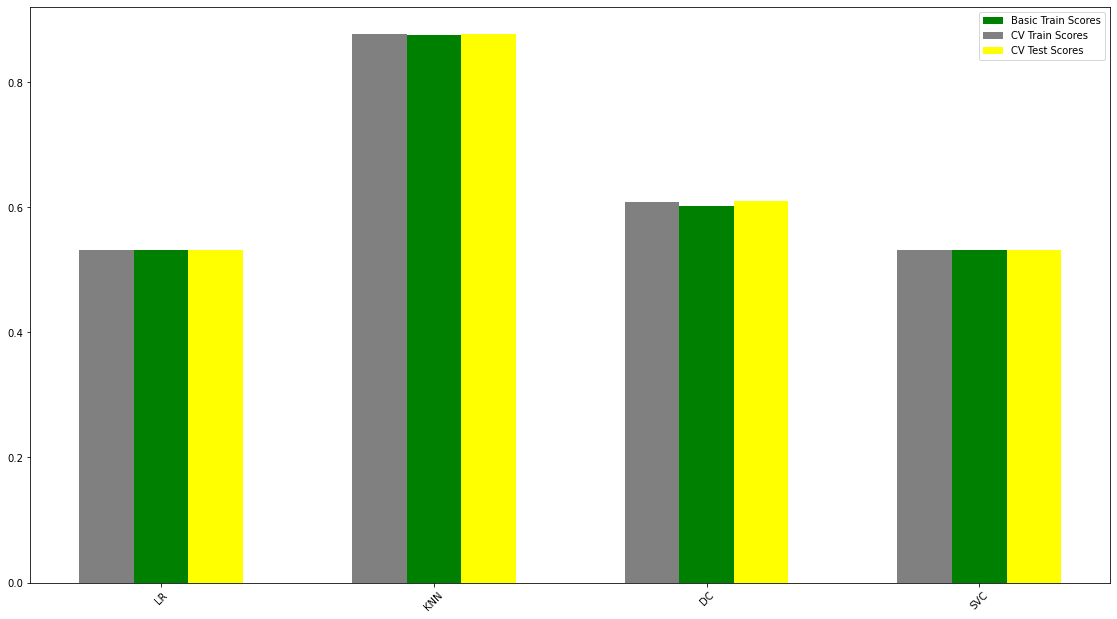

In [807]:
plot_comparison=comparison
plot_comparison['Train_Accuracy'] = dfCompare['Train_Accuracy']
plot_comparison['Test_Accuracy'] = dfCompare['Test_Accuracy']
basic_scores=plot_comparison['best_score']
cv_train_scores=plot_comparison['Train_Accuracy']
cv_test_scores=plot_comparison['Test_Accuracy']
fig = plt.figure()
X_axis = np.arange(len(plot_comparison['model']))
ax = fig.add_axes([0,0,1,1])
plt.bar(X_axis,basic_scores,0.2,color='green',label='Basic Train Scores')
plt.bar(X_axis - 0.2,cv_train_scores,0.2,color='grey',label='CV Train Scores')
plt.bar(X_axis + 0.2,cv_test_scores,0.2,color='yellow',label='CV Test Scores')
plt.xticks(rotation = 45)
plt.xticks(X_axis, comparison['model'])
plt.legend()
plt.rcParams['figure.figsize']=(15,8)
plt.show()

## <span style="color:blue">Use a cross validation technique to test the model.</span>
### <span style="color:green">The basic cross validation has had no effect on the model performance, the time taken by the model has increased in some cases but the performance hasn't seen any improvement</span>

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

## <span style="color:blue">Model Improvement.</span>
### <span style="color:green">1. Following Steps have been taken in attempt to improve the model performance.</span>
### <span style="color:green">2. Add Additional features to the data</span>
### <span style="color:green">3. Balance the class after adding additional features</span>
### <span style="color:green">4. Encode the new features using category encoder</span>
### <span style="color:green">5. Tune the Hyper parameters on each of the model</span>

In [705]:
for c in df.columns:
        print('missing values in - ' + str(c) + '  ' + str(df[c].isnull()))
for x in df.columns:
    values=[]
    for i in df[x].unique():
        values.append(i)
    print(str(x) + '--' + str(values))

missing values in - age  0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Name: age, Length: 41188, dtype: bool
missing values in - job  0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Name: job, Length: 41188, dtype: bool
missing values in - marital  0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Name: marital, Length: 41188, dtype: bool
missing values in - education  0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Name: education, Length: 41188, dtype: bool
missing values in - default  0        False
1        False
2        

In [707]:
dfCopy1 = df

for x in dCopy1.columns:
    dCopy1[x] = dCopy1[x].astype('category')
    dCopy1[x] = dCopy1[x].cat.codes

for x in dfCopy1.columns:
    values=[]
    for i in dfCopy1[x].unique():
        values.append(i)
    print(str(x) + '--' + str(values))

age--[39, 40, 20, 23, 28, 42, 24, 7, 8, 12, 18, 37, 29, 33, 22, 13, 38, 32, 17, 35, 41, 15, 21, 27, 25, 43, 36, 30, 34, 31, 16, 14, 26, 19, 11, 10, 9, 5, 6, 3, 4, 44, 2, 1, 53, 49, 59, 50, 56, 71, 76, 60, 51, 58, 46, 63, 45, 48, 55, 65, 47, 54, 52, 61, 68, 62, 66, 64, 57, 0, 70, 73, 69, 77, 75, 67, 74, 72]
job--[3, 7, 0, 1, 9, 5, 4, 10, 6, 11, 2, 8]
marital--[1, 2, 0, 3]
education--[0, 3, 1, 2, 5, 7, 6, 4]
default--[0, 1, 2]
housing--[0, 2, 1]
loan--[0, 2, 1]
contact--[1, 0]
month--[6, 4, 3, 1, 8, 7, 2, 5, 0, 9]
day_of_week--[1, 3, 4, 2, 0]
duration--[261, 149, 226, 151, 307, 198, 139, 217, 380, 50, 55, 222, 137, 293, 146, 174, 312, 440, 353, 195, 38, 262, 342, 181, 172, 99, 93, 233, 255, 362, 348, 386, 73, 230, 208, 336, 365, 1425, 577, 366, 314, 160, 212, 188, 22, 616, 178, 355, 225, 266, 253, 179, 269, 135, 161, 787, 145, 449, 812, 164, 357, 232, 91, 273, 158, 177, 200, 176, 211, 214, 1395, 349, 337, 272, 193, 165, 1034, 20, 246, 529, 192, 1344, 180, 48, 213, 545, 583, 221, 426, 287

In [708]:
X1=dCopy1.drop('y',axis=1)
y1=dCopy1['y']

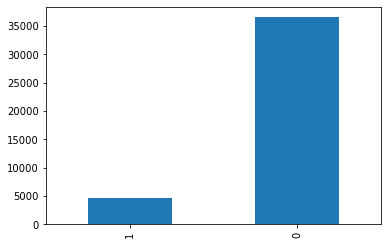

In [709]:
bar_plot(y1)

In [710]:
X1_t,X1_test,y1_t,y1_test=train_test_split(X1,y1,random_state=42,test_size=0.3)

In [711]:
print_target_stats(y1_t,y1_test)

Training target statistics: Counter({0: 25580, 1: 3251})
Testing target statistics: Counter({0: 10968, 1: 1389})


In [712]:
sampler1 = SMOTE(k_neighbors=5)
X1_sampled, y1_sampled = sampler1.fit_resample(X1_t, y1_t)

In [713]:
print_target_stats(y_sampled,y_test)

Training target statistics: Counter({0: 25580, 1: 25580})
Testing target statistics: Counter({0: 10968, 1: 1389})


In [714]:
print_target_stats(y1_sampled,y1_test)

Training target statistics: Counter({0: 25580, 1: 25580})
Testing target statistics: Counter({0: 10968, 1: 1389})


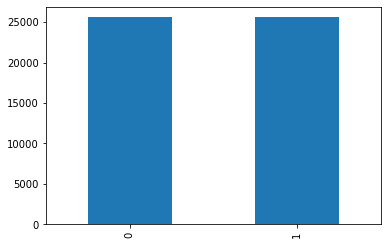

In [715]:
bar_plot(y1_sampled)

In [817]:
def lr_params(X_train):
    max_iter=[100]
    C = np.logspace(-4, 4, 50)
    penalty = ['l1', 'l2']
    lr_params = {'max_iter':max_iter,
                      'C':C,
                      'penalty':penalty}
    return lr_params

In [818]:
def knn_params(X_train):
    k_range = [5]
    knn_params = dict(n_neighbors=k_range)
    return knn_params

In [819]:
def dc_params(X_train):
    dc_params = {'criterion':['gini','entropy'],'max_depth':[4,10,50,100]}
    return dc_params

In [820]:
def svc_params(X_train):
    svc_params = {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.1, 1],
                'max_iter': [10],
                'class_weight': [None, 'balanced']}
    return svc_params

In [821]:
dfCompareOptimize= pd.DataFrame({'Model': [], 
             'Train_Time': [],
             'Test_Time': [],
             'Train_Accuracy': [],
             'Test_Accuracy':[],
             'Best_Params':[]})
dfCompareOptimize=dfCompareOptimize.astype(str)
print(dfCompareOptimize.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Model           0 non-null      object
 1   Train_Time      0 non-null      object
 2   Test_Time       0 non-null      object
 3   Train_Accuracy  0 non-null      object
 4   Test_Accuracy   0 non-null      object
 5   Best_Params     0 non-null      object
dtypes: object(6)
memory usage: 124.0+ bytes
None


In [822]:
def pi_grid_optimize(name,model,X_train,y_train,X_test,y_test,param,title='Confusion Matrix',cmap=plt.cm.Blues):
    
    sfs(model,X_train,y_train)
    
    train_start=time.time()
    reg_model=model.fit(X_train,y_train)
    train_end=time.time()
    
    r = permutation_importance(reg_model,X_train,y_train,n_repeats=9,random_state=42)
    r.importances_mean
    pi = pd.DataFrame({"Features":X_train.columns,"importance":r.importances_mean}).sort_values(by="importance",ascending=False)
    print_line_separator()
    print(pi)
    train_score = model.score(X_test,y_test)
    
    grid = GridSearchCV(estimator=model, param_grid=param)
    test_start=time.time()
    grid.fit(X_train,y_train)
    test_end=time.time()
    grid_pred=grid.predict(X_test)
    test_score=grid.score(X_test,y_test)
    best_params=grid.best_params_
    print_line_separator()
    conf = metrics.ConfusionMatrixDisplay.from_predictions(y_test, grid_pred)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicated label')
    
    dfCompareOptimize.loc[len(dfCompareOptimize.index)] = [name,train_end-train_start,test_end-test_start,train_score,test_score,best_params]
    print(dfCompareOptimize)
    print_line_separator()

In [823]:
def reg_grid_optimize_model(name,X_train,y_train,X_test,y_test):
    reg=''
    grid_param=''
    if(name=='LR'):
        reg = LogisticRegression()
        grid_param=lr_params(X_train)
    if(name=='KNN'):
        reg = KNeighborsClassifier()
        grid_param=knn_params(X_train)
    if(name=='DC'):
        reg = DecisionTreeClassifier()
        grid_param=dc_params(X_train)
    if(name=='SVC'):
        reg = SVC()
        grid_param=svc_params(X_train)
    pi_grid_optimize(name,reg,X_train,y_train,X1_test,y1_test,grid_param)
#np.seterr('raise')

In [ ]:
reg_grid_optimize_model('LR',X1_sampled,y1_sampled,X1_test,y1_test)

In [ ]:
reg_grid_optimize_model('KNN',X1_sampled,y1_sampled,X1_test,y1_test)

In [ ]:
reg_grid_optimize_model('DC',X1_sampled,y1_sampled,X1_test,y1_test)

In [ ]:
reg_grid_optimize_model('SVC',X1_sampled,y1_sampled,X1_test,y1_test)

## <span style="color:blue">Conclusions from Model Improvement Attempts</span>
### <span style="color:green">Adding additional features has improved the model performance though has impacted the fit time of the model</span>
### <span style="color:green">Hyper parameter tuning has improved the model performance though has impacted the fit time of the model</span>
### <span style="color:green">Model improvement has shown significant improvement in the model performance</span>

In [ ]:
basic_scores=comparison['best_score']
cv_train_scores=dfCompare['Test_Accuracy']
cv_test_scores=dfCompareOptimize['Test_Accuracy']
fig = plt.figure()
X_axis = np.arange(len(comparison['model']))
ax = fig.add_axes([0,0,1,1])
plt.bar(X_axis,basic_scores,0.2,color='green',label='Basic Train Scores')
plt.bar(X_axis - 0.2,cv_train_scores,0.2,color='grey',label='CV Train Scores')
plt.bar(X_axis + 0.2,cv_test_scores,0.2,color='yellow',label='CV Test Scores')
plt.xticks(rotation = 45)
plt.xticks(X_axis, comparison['model'])
plt.legend()
plt.rcParams['figure.figsize']=(15,8)
plt.show()

In [ ]:
basic_scores=comparison['best_time']
cv_train_scores=dfCompare['Train_Time']
cv_test_scores=dfCompareOptimize['Train_Time']
fig = plt.figure()
X_axis = np.arange(len(comparison['model']))
ax = fig.add_axes([0,0,1,1])
plt.bar(X_axis,basic_scores,0.2,color='green',label='Basic Train Scores')
plt.bar(X_axis - 0.2,cv_train_scores,0.2,color='grey',label='CV Train Scores')
plt.bar(X_axis + 0.2,cv_test_scores,0.2,color='yellow',label='CV Test Scores')
plt.xticks(rotation = 45)
plt.xticks(X_axis, comparison['model'])
plt.legend()
plt.rcParams['figure.figsize']=(15,8)
plt.show()

##### Questions